## Classification : Decision Tree  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [7]:
#은행 데이터
bank=pd.read_csv("bank.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### EDA

In [17]:
bank.info()
bank.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


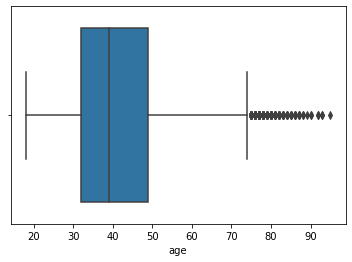

In [21]:
sns.boxplot(x=bank["age"])


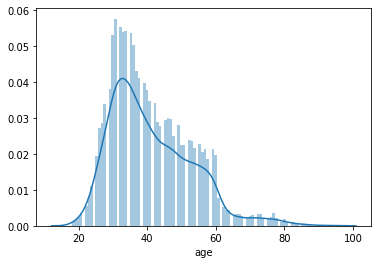

In [25]:
sns.distplot(bank.age, bins=100)

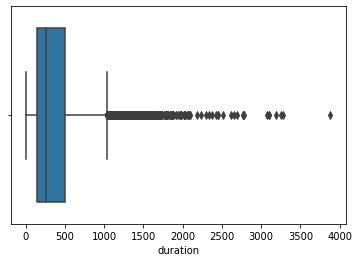

In [23]:
sns.boxplot(x=bank["duration"])

In [26]:
bankData=bank.copy()

In [27]:
bankData.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [33]:
bankData["job"].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [31]:
bankData.groupby("job").size()

job
admin.           1334
blue-collar      1944
entrepreneur      328
housemaid         274
management       2566
retired           778
self-employed     405
services          923
student           360
technician       1823
unemployed        357
unknown            70
dtype: int64

In [40]:
bankData[(bankData["job"]=="admin.") & (bankData["deposit"]=="yes")]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
18,41,admin.,married,secondary,no,55,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,35,admin.,married,secondary,no,2374,yes,no,cellular,11,aug,765,2,183,5,success,yes
5255,33,admin.,married,unknown,no,2780,no,no,cellular,19,nov,485,1,-1,0,unknown,yes
5267,32,admin.,married,tertiary,no,284,yes,no,cellular,29,apr,717,3,-1,0,unknown,yes
5283,45,admin.,divorced,secondary,no,0,no,no,cellular,29,oct,264,1,-1,0,unknown,yes


In [42]:
jobs=list(set(bankData.job.values))

In [46]:
for job in jobs:
    print("{:15}:{:5}".format(job, len(bankData[(bankData["deposit"]=="yes") & (bankData["job"]==job)])))

student        :  269
admin.         :  631
self-employed  :  187
services       :  369
technician     :  840
blue-collar    :  708
entrepreneur   :  123
unknown        :   34
unemployed     :  202
retired        :  516
management     : 1301
housemaid      :  109


In [50]:
bankData["job"]=bankData["job"].replace(["admin.","management"],"white-collar")
bankData["job"]=bankData["job"].replace(["services","housemaid"],"pink-collar")
bankData["job"]=bankData["job"].replace(["student","self-employed","technician","entrepreneur","unknown","unemployed","retired","blue-collar"],"other")

In [51]:
bankData["job"].value_counts()

other           6065
white-collar    3900
pink-collar     1197
Name: job, dtype: int64

In [52]:
bankData["poutcome"].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [54]:
bankData["poutcome"]=bankData["poutcome"].replace("other","unknown")

In [55]:
bankData["poutcome"].value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [57]:
bankData["contact"].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [58]:
bankData.drop("contact",axis=1, inplace=True)

In [60]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [61]:
bankData["default"].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [67]:
bankData["default_cat"]=np.where(bankData["default"]=="yes",1,0) #방법1
bankData["default_cat"]=bankData["default"].map({"yes":1,"no":0}) #방법2

In [70]:
bankData.drop("default",axis=1,inplace=True)

In [71]:
bankData

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,-1,0,unknown,yes,0
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,-1,0,unknown,yes,0
2,41,other,married,secondary,1270,yes,no,5,may,1389,1,-1,0,unknown,yes,0
3,55,pink-collar,married,secondary,2476,yes,no,5,may,579,1,-1,0,unknown,yes,0
4,54,white-collar,married,tertiary,184,no,no,5,may,673,2,-1,0,unknown,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,yes,no,20,apr,257,1,-1,0,unknown,no,0
11158,39,pink-collar,married,secondary,733,no,no,16,jun,83,4,-1,0,unknown,no,0
11159,32,other,single,secondary,29,no,no,19,aug,156,2,-1,0,unknown,no,0
11160,43,other,married,secondary,0,no,yes,8,may,9,2,172,5,failure,no,0


In [74]:
bankData["housing_cat"]=np.where(bankData["housing"]=="yes",1,0)
bankData.drop("housing",axis=1,inplace=True)

In [75]:
bankData["loan_cat"]=np.where(bankData["loan"]=="yes",1,0)
bankData.drop("loan",axis=1,inplace=True)

In [77]:
bankData["deposit_cat"]=np.where(bankData["deposit"]=="yes",1,0)
bankData.drop("deposit",axis=1,inplace=True)

In [78]:
bankData

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,5,may,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,5,may,1467,1,-1,0,unknown,0,0,0,1
2,41,other,married,secondary,1270,5,may,1389,1,-1,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,5,may,579,1,-1,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,5,may,673,2,-1,0,unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,20,apr,257,1,-1,0,unknown,0,1,0,0
11158,39,pink-collar,married,secondary,733,16,jun,83,4,-1,0,unknown,0,0,0,0
11159,32,other,single,secondary,29,19,aug,156,2,-1,0,unknown,0,0,0,0
11160,43,other,married,secondary,0,8,may,9,2,172,5,failure,0,0,1,0


In [79]:
bankData.drop("month",axis=1,inplace=True)
bankData.drop("day",axis=1,inplace=True)

In [80]:
bankData

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,0,0,0,1
2,41,other,married,secondary,1270,1389,1,-1,0,unknown,0,1,0,1
3,55,pink-collar,married,secondary,2476,579,1,-1,0,unknown,0,1,0,1
4,54,white-collar,married,tertiary,184,673,2,-1,0,unknown,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,257,1,-1,0,unknown,0,1,0,0
11158,39,pink-collar,married,secondary,733,83,4,-1,0,unknown,0,0,0,0
11159,32,other,single,secondary,29,156,2,-1,0,unknown,0,0,0,0
11160,43,other,married,secondary,0,9,2,172,5,failure,0,0,1,0


In [81]:
#bankData["pdays"]==-1를 모두 10000으로 변경
bankData["pdays"]=np.where(bankData["pdays"]==-1,10000,bankData["pdays"])

In [82]:
bankData["recent_pdays"]=np.where(bankData["pdays"], 1/bankData["pdays"],1/bankData["pdays"] )

In [83]:
bankData["recent_pdays"]

0        0.000100
1        0.000100
2        0.000100
3        0.000100
4        0.000100
           ...   
11157    0.000100
11158    0.000100
11159    0.000100
11160    0.005814
11161    0.000100
Name: recent_pdays, Length: 11162, dtype: float64

In [84]:
bankData.drop("pdays",axis=1,inplace=True)

In [85]:
bankData

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,0,1,0,1,0.000100
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,0,0,1,0.000100
2,41,other,married,secondary,1270,1389,1,0,unknown,0,1,0,1,0.000100
3,55,pink-collar,married,secondary,2476,579,1,0,unknown,0,1,0,1,0.000100
4,54,white-collar,married,tertiary,184,673,2,0,unknown,0,0,0,1,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,other,single,primary,1,257,1,0,unknown,0,1,0,0,0.000100
11158,39,pink-collar,married,secondary,733,83,4,0,unknown,0,0,0,0,0.000100
11159,32,other,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,other,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814


In [87]:
bankWithDummies=pd.get_dummies(data=bankData, columns=["job","marital","education","poutcome"], prefix=["job","marital","education","poutcome"])

In [93]:
bankWithDummies

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0,0.000100,...,0,0,1,1,0,0,0,0,0,1
11158,39,733,83,4,0,0,0,0,0,0.000100,...,0,1,0,0,1,0,0,0,0,1
11159,32,29,156,2,0,0,0,0,0,0.000100,...,0,0,1,0,1,0,0,0,0,1
11160,43,0,9,2,5,0,0,1,0,0.005814,...,0,1,0,0,1,0,0,1,0,0


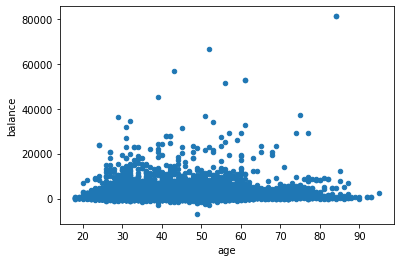

In [94]:
bankWithDummies.plot(kind="scatter", x="age", y="balance")

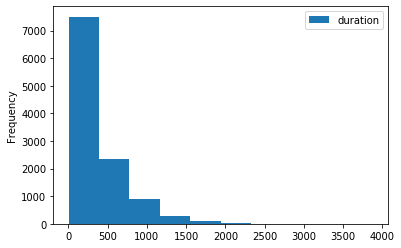

In [95]:
bankWithDummies.plot(kind="hist", x="poutcome_success", y="duration")

In [97]:
bankWithDummies[bankData.deposit_cat==1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
bankWithDummies[(bankWithDummies.deposit_cat==1)&(bankWithDummies.loan_cat)&(bankWithDummies.housing_cat)]

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
5,42,0,562,2,0,0,1,1,1,0.000100,...,0,0,1,0,0,1,0,0,0,1
6,56,830,1201,1,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
12,29,199,1689,4,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
19,49,168,513,1,0,0,1,1,1,0.000100,...,1,0,0,0,1,0,0,0,0,1
40,60,1262,1015,1,0,0,1,1,1,0.000100,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5223,51,5350,612,4,0,0,1,1,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
5237,24,-389,1242,1,0,0,1,1,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
5239,39,25,658,1,3,0,1,1,1,0.002849,...,0,1,0,0,1,0,0,1,0,0
5253,31,-537,1039,7,0,0,1,1,1,0.000100,...,0,1,0,1,0,0,0,0,0,1


In [104]:
len(bankWithDummies[(bankWithDummies["deposit_cat"]==1) & (bankWithDummies["default_cat"]==1)])
#52명은 정기예금 가입 및 채무불이향도 한 경우

52

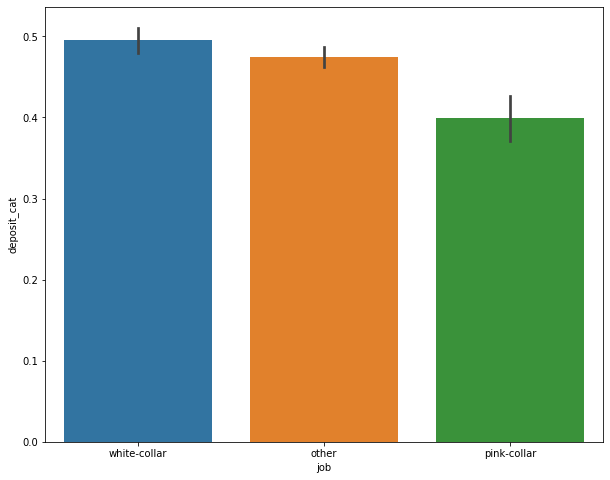

In [106]:
plt.figure(figsize=(10,8))
sns.barplot(x="job", y="deposit_cat", data=bankData)

In [177]:
bankData
bankWithDummies

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.000100,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0,0.000100,...,0,0,1,1,0,0,0,0,0,1
11158,39,733,83,4,0,0,0,0,0,0.000100,...,0,1,0,0,1,0,0,0,0,1
11159,32,29,156,2,0,0,0,0,0,0.000100,...,0,0,1,0,1,0,0,0,0,1
11160,43,0,9,2,5,0,0,1,0,0.005814,...,0,1,0,0,1,0,0,1,0,0


In [115]:
bankwd=bankWithDummies
corr=bankwd.corr()

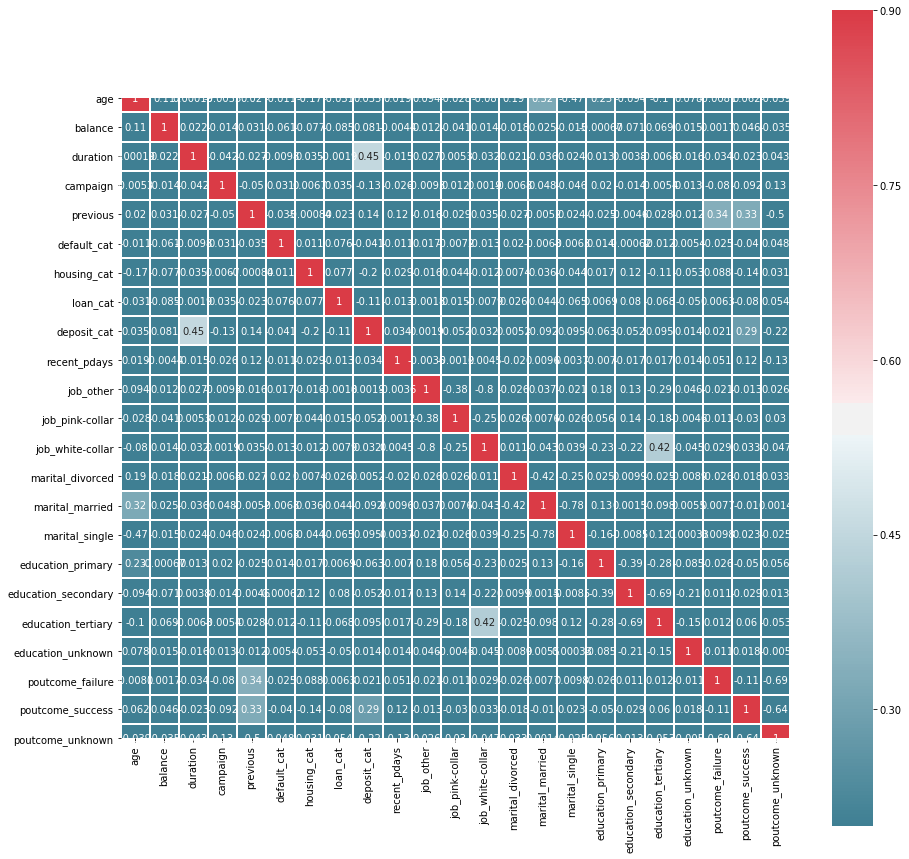

In [131]:
plt.figure(figsize=(15,15))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidth=1, square=True, annot=True, vmin= 0.2 ,vmax=0.9)

In [132]:
corr_deposit=pd.DataFrame(corr["deposit_cat"].drop("deposit_cat"))

In [136]:
corr_deposit["deposit_cat"].sort_values(ascending=False)
#양의 상관관계가 가장 높은 것은 durantion.poutcome_success

duration               0.451919
poutcome_success       0.286642
previous               0.139867
marital_single         0.094632
education_tertiary     0.094598
balance                0.081129
age                    0.034901
recent_pdays           0.034457
job_white-collar       0.031621
poutcome_failure       0.020714
education_unknown      0.014355
marital_divorced       0.005228
job_other              0.001859
default_cat           -0.040680
job_pink-collar       -0.051717
education_secondary   -0.051952
education_primary     -0.063002
marital_married       -0.092157
loan_cat              -0.110580
campaign              -0.128081
housing_cat           -0.203888
poutcome_unknown      -0.224785
Name: deposit_cat, dtype: float64

In [137]:
#모델 
dropDeposit= bankwd.drop("deposit_cat",1) #입력
label=bankwd.deposit_cat

In [144]:
dataTrain, dataTest, labelTrain, labelTest=train_test_split(dropDeposit,label, train_size=0.2, random_state=42)

In [155]:
dt2=tree.DecisionTreeClassifier(max_depth=10)
dt2.fit(dataTrain, labelTrain)
dt2_sc_train=dt2.score(dataTrain, labelTrain)
dt2_sc_test=dt2.score(dataTest, labelTest)

In [156]:
print("트레이닝 스코어:", dt2_sc_train)
print("테스트 스코어:", dt2_sc_test)

트레이닝 스코어: 0.9036738351254481
테스트 스코어: 0.7615901455767077


연습문제(타이타닉 데이터셋)
-생존여부(출력변수)
-decision Tree(최적 depth)
-train과 test정확도

In [192]:
train=pd.read_csv("titanic/train.csv")
test=pd.read_csv("titanic/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [193]:
#null값: Age, Cabin, Embarked

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [194]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [195]:
train[train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [196]:
train[train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [197]:
train[train["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [198]:
train["Sex"]=np.where(train["Sex"]=="male",1,0)
train["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [199]:
train["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
F2             3
              ..
E12            1
B42            1
B38            1
D37            1
A36            1
Name: Cabin, Length: 147, dtype: int64

In [204]:
titanicDummies=pd.get_dummies(data=train, columns=["Embarked"], prefix=["Embarked"])

In [205]:
titanicDummies

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,1,0,0


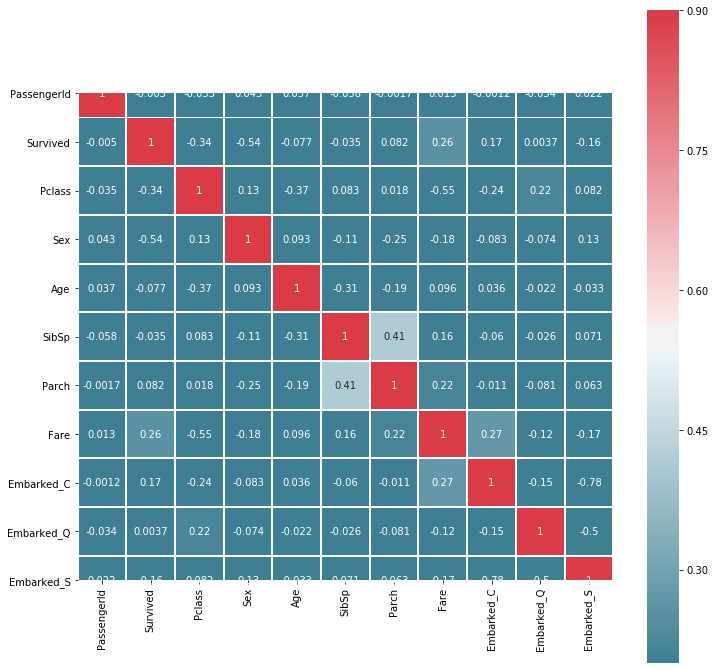

In [206]:
corr=titanicDummies.corr()

plt.figure(figsize=(12,12))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidth=1, square=True, annot=True, vmin= 0.2 ,vmax=0.9)